#1. Importing The Dependencies

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

#2. Loading The Dataset And Analysizing

In [98]:
# loading the dataset into pandas dataframe
df = pd.read_csv('/content/Austim Dataset.csv')

In [99]:
df.shape

(800, 22)

In [100]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [101]:
# display all columns of a dataframe
pd.set_option('display.max_columns', None)

In [102]:
# convert age column data type from float to int
df['age'] = df['age'].astype(int)

In [103]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [104]:
# checking for unquie values in each column

for col in df.columns:
  numerical_features = ['ID','age','result']
  if col not in numerical_features:
    print(col,df[col].unique())
    print('-'*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [105]:
# dropping the ID and age_desc columns
df = df.drop(columns=['ID','age_desc'])

In [106]:
df.shape

(800, 20)

In [107]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [108]:
# define the mapping dictionary for country names
mapping={
    'Viet Nam': 'Vietnam',
    'AmericanSamao': 'United States',
    'Hong Kong':'China'
}

# replace value in the country column
df['contry_of_res'] = df['contry_of_res'].replace(mapping)

In [109]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China',
       'Angola', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [110]:
# checking the target class distribution
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


# Insights:
  1.missing values in ethnicity and relation columns

  2.age_desc column has only 1 unique value, so it has been removed as it is not important for prediction

  3.fixed country names
  
  4.identified class imbalance in the target(Class/AMD) column

# 3. Exploratory Data Analysis

In [111]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


In [112]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


**Univariate Analysis**

Numerical Columns:

  - age

  - result

In [113]:
# set the desired theme
sns.set_theme(style='darkgrid')

Distribution Plots

Mean: 27.96375
Median: 24.0


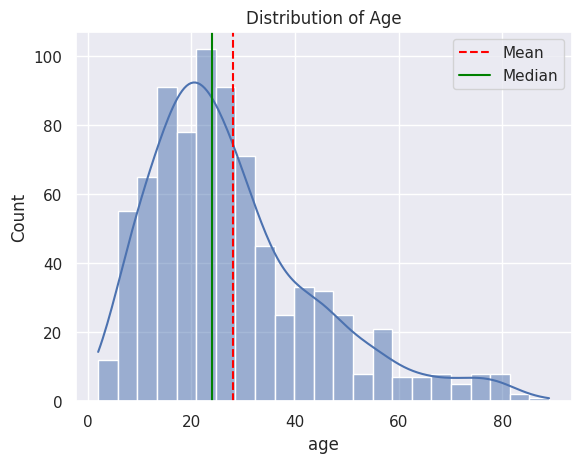

In [114]:
# Histogram for 'age'

sns.histplot(df['age'],kde=True)
plt.title('Distribution of Age')

age_mean=df['age'].mean()
age_median=df['age'].median()

print('Mean:',age_mean)
print('Median:',age_median)

#add vertical lines for mean and median
plt.axvline(age_mean,color='red',linestyle='--',label='Mean')
plt.axvline(age_median,color='green',linestyle='-',label='Median')

plt.legend()

plt.show()

Mean: 8.537303106501248
Median: 9.605299308


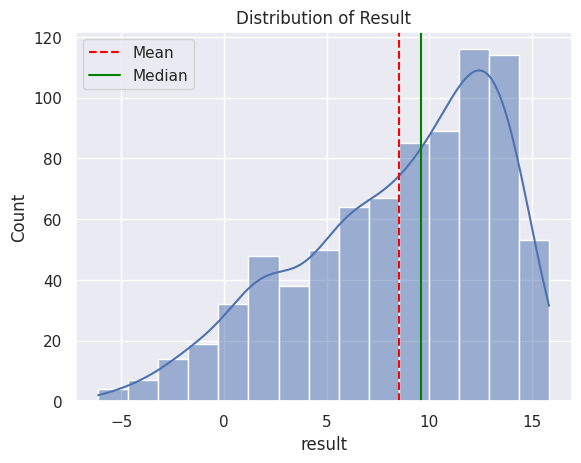

In [115]:
# Histogram for 'result'

sns.histplot(df['result'],kde=True)
plt.title('Distribution of Result')

result_mean=df['result'].mean()
result_median=df['result'].median()

print('Mean:',result_mean)
print('Median:',result_median)

#add vertical lines for mean and median
plt.axvline(result_mean,color='red',linestyle='--',label='Mean')
plt.axvline(result_median,color='green',linestyle='-',label='Median')

plt.legend()

plt.show()

Box plots for identifying outliers in the numerical columns

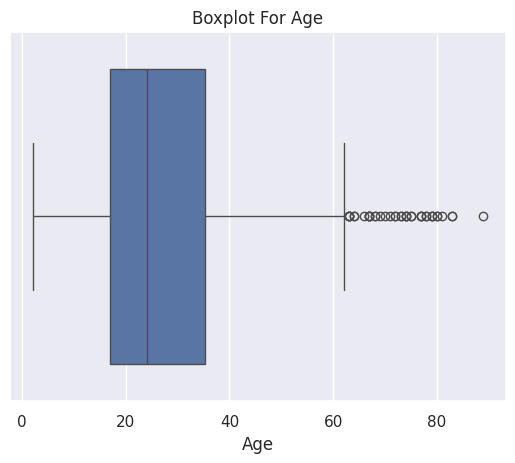

In [116]:
#box plot
sns.boxplot(x=df['age'])
plt.title('Boxplot For Age')
plt.xlabel('Age')
plt.show()

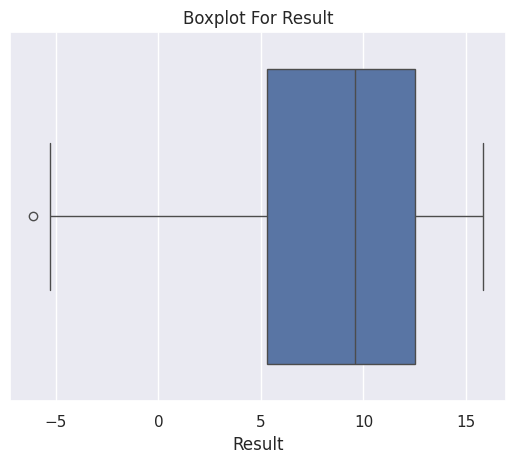

In [117]:
#box plot
sns.boxplot(x=df['result'])
plt.title('Boxplot For Result')
plt.xlabel('Result')
plt.show()

In [118]:
# count the outliers using IQR method
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
age_outliers=df[(df['age']<lower_bound) | (df['age']>upper_bound)]

In [119]:
len(age_outliers)

39

In [120]:
# count the outliers using IQR method
Q1=df['result'].quantile(0.25)
Q3=df['result'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
result_outliers=df[(df['result']<lower_bound) | (df['result']>upper_bound)]

In [121]:
len(result_outliers)

1

Univariate analysis of Categorical columns

In [122]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

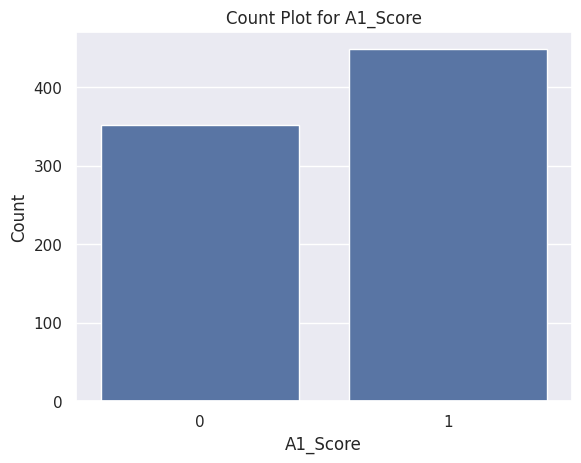

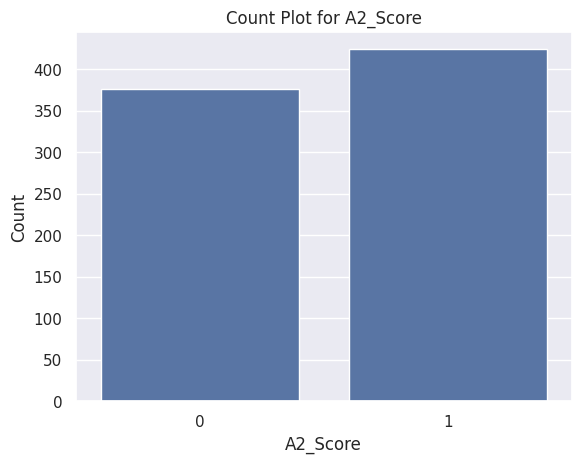

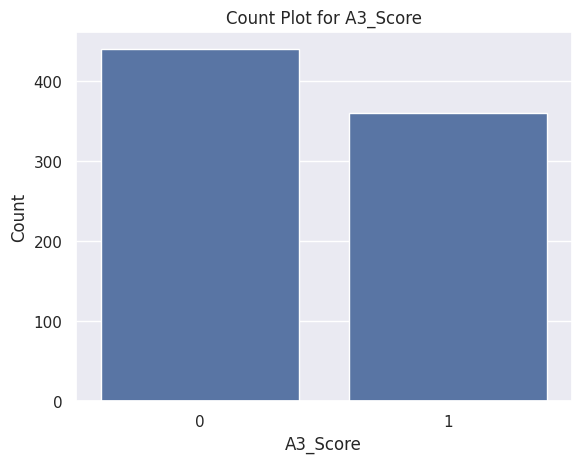

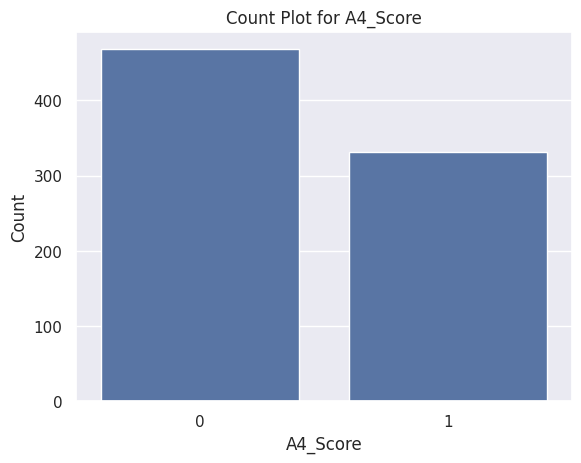

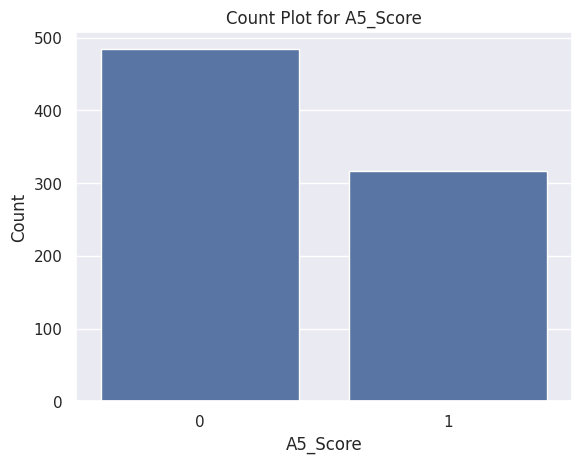

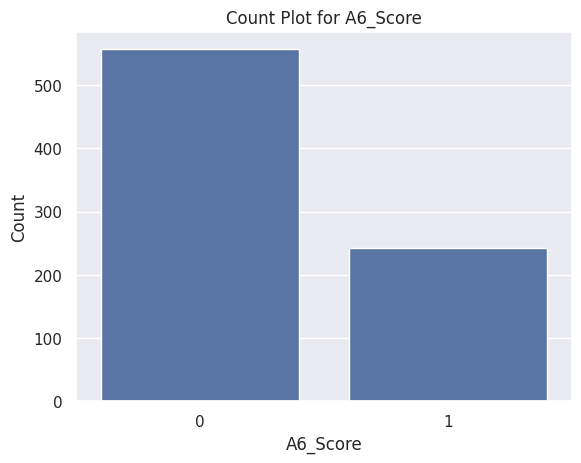

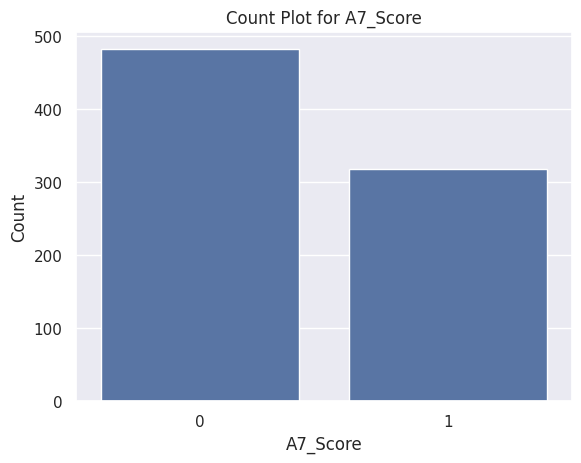

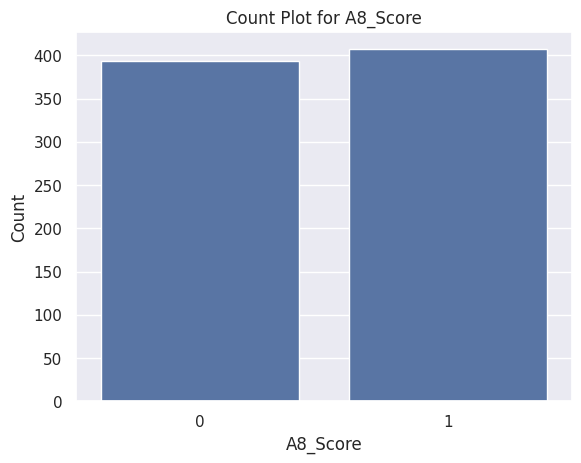

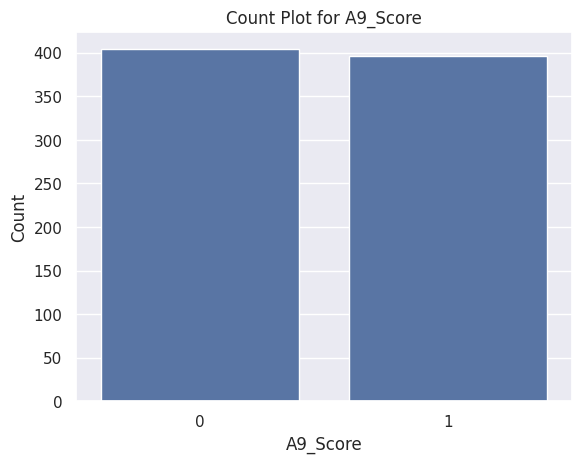

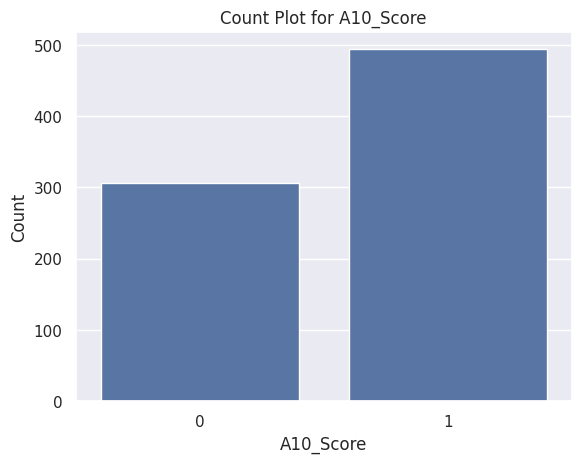

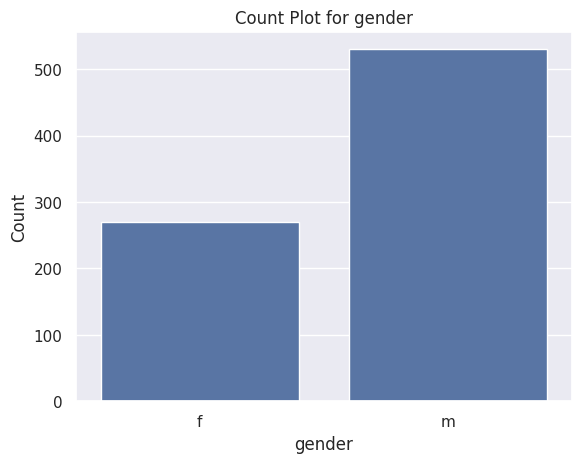

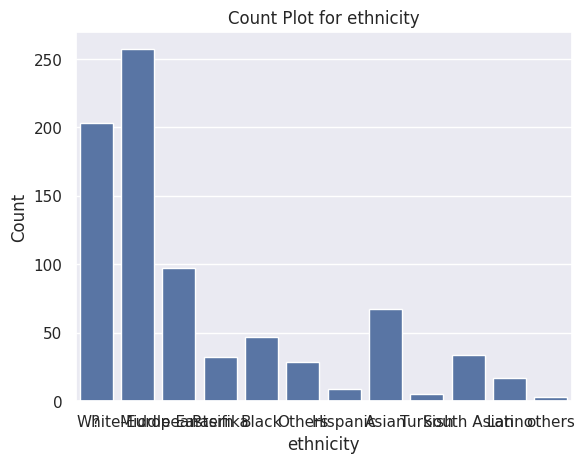

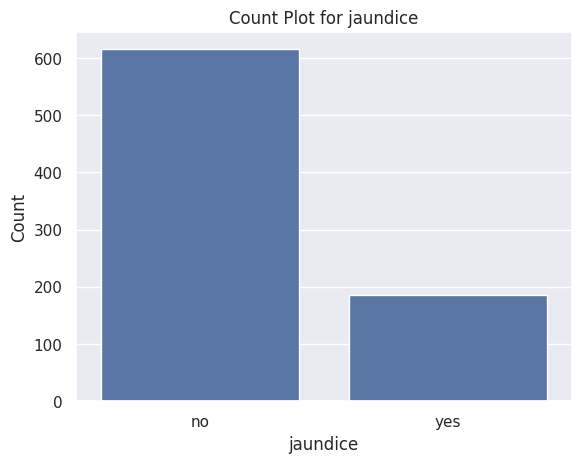

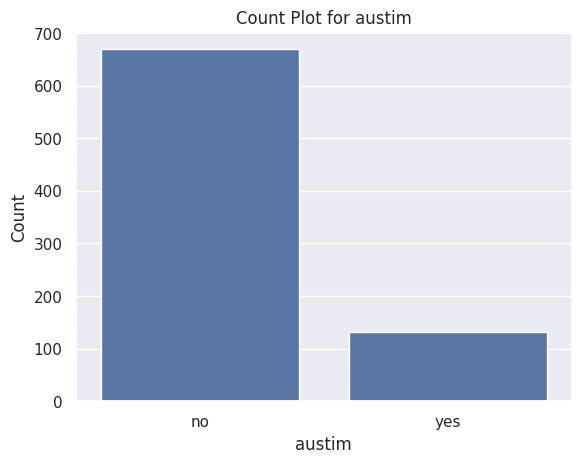

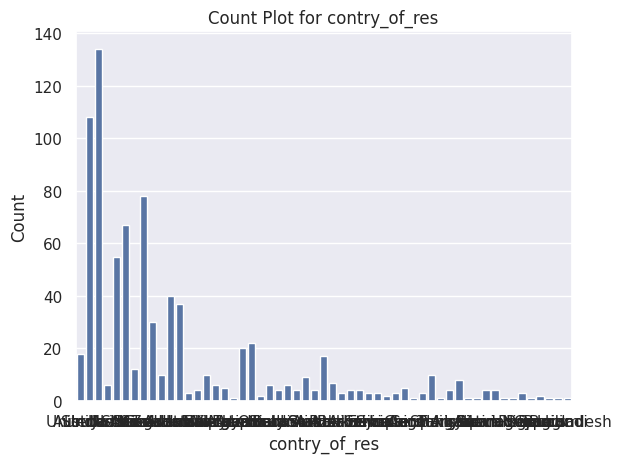

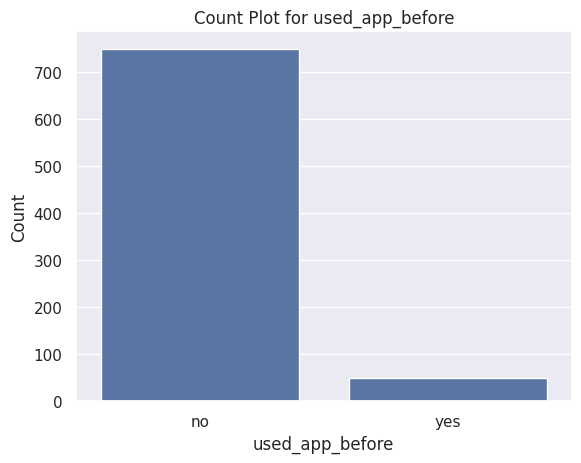

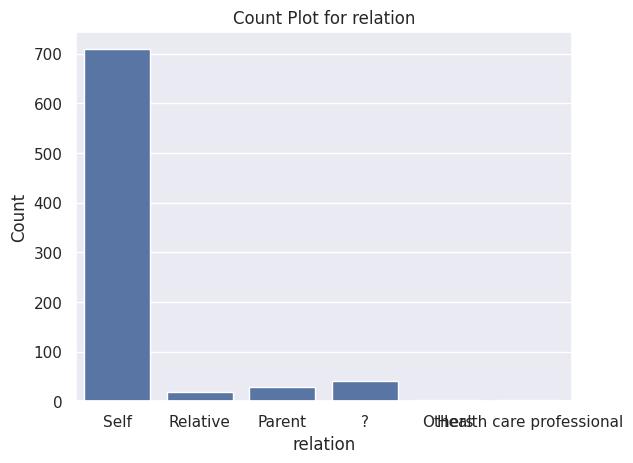

In [123]:
categorical_columns=['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score','gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before','relation']

for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.title(f'Count Plot for {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()

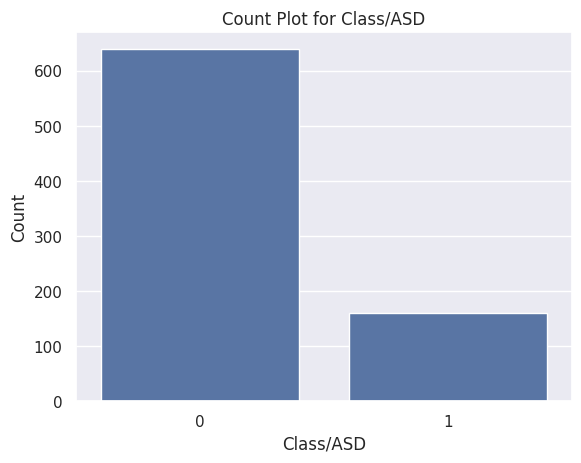

In [124]:
# count plot for target column(Class/ASD)
sns.countplot(x=df['Class/ASD'])
plt.title('Count Plot for Class/ASD')
plt.xlabel('Class/ASD')
plt.ylabel('Count')
plt.show()

Handling The Missing Values In 'ethnicity' and 'relation' column

In [125]:
df['ethnicity']=df['ethnicity'].replace({'?':'Others','others':'Others'})

In [126]:
df['ethnicity'].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [127]:
df['relation']=df['relation'].replace({'?':'Others',
                                       'Relative':'Others',
                                       'Parent':'Others',
                                       'Health care professional':'Others'
                                       })

In [128]:
df['relation'].unique()

array(['Self', 'Others'], dtype=object)

In [129]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


**Label Encoding**

In [130]:
 # selecting columns with 'object' data type
 object_columns = df.select_dtypes(include=['object']).columns

In [131]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [132]:
# initialize a dictionary to store the encoders
encoders={}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder=LabelEncoder()
  df[column]=label_encoder.fit_transform(df[column])
  encoders[column]=label_encoder   #saving the encoder for this column

# save the encoders as a pickle file
with open('encoders.pkl','wb') as f:
  pickle.dump(encoders, f)

In [133]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [134]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,7,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,24,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,53,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,53,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,45,0,-4.777286,1,0


Bivariate Analysis

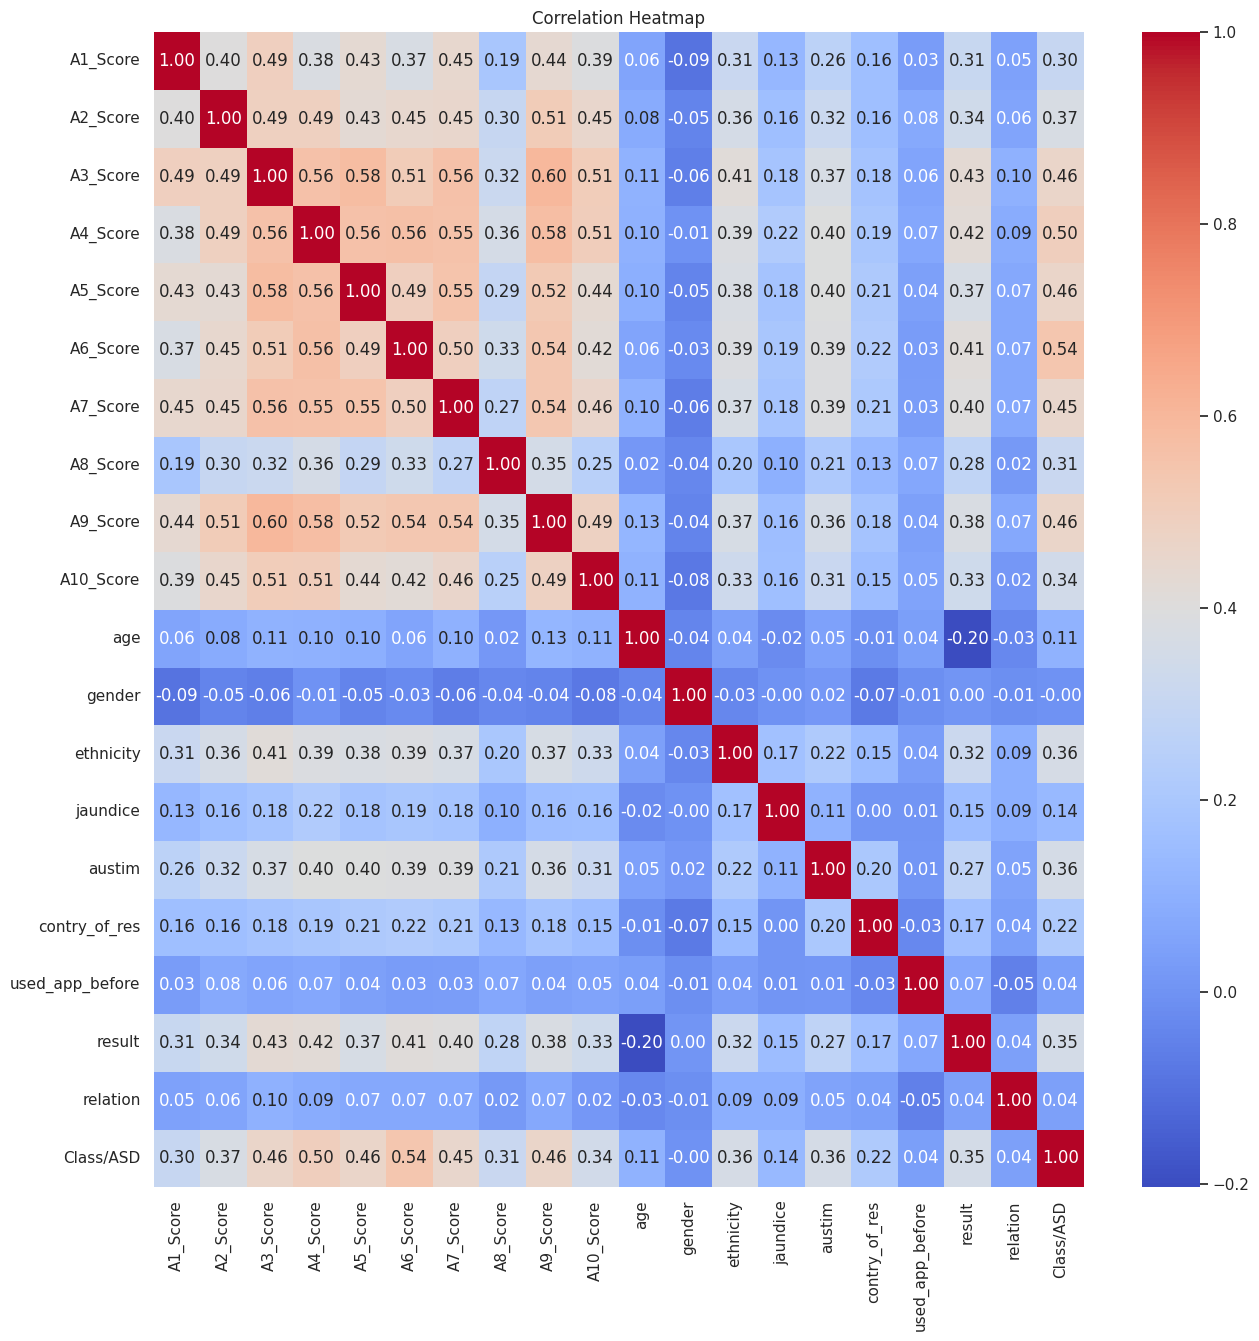

In [135]:
# correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Insights from EDA:**

     - There are few outliers in the numerical columns (age,results)

     - There is a class imbalance in the target column

     - There is a class imbalance in the categorical features

     - We don't have any highly correlated column
     
     - Performed label encoding and saved the encoders

# 4. Data Preprocessing

Handling The Outliers

In [136]:
# function to replace the outliers with median
def replace_outliers_with_median(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1

  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR

  median=df[column].median()

  # replace outliers with median value
  df[column]= df[column].apply(lambda x: median if x< lower_bound or x> upper_bound else x)

  return df

In [137]:
# replace outliers in the 'age' column
df=replace_outliers_with_median(df,'age')

# replace outliers in the 'result' column
df=replace_outliers_with_median(df,'result')

In [138]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,7,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,24,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,53,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,53,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,45,0,-4.777286,1,0


**Splitting The Features And Label Columns In The Dataset**

In [139]:
x = df.drop(columns=['Class/ASD'])
y = df['Class/ASD']

In [140]:
print(x)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  aust

In [141]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


**Splitting The Dataset Into Train And Test Data**

In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [143]:
print(x.shape,x_train.shape,x_test.shape)

(800, 19) (640, 19) (160, 19)


SMOTE(Synthetic Minority Oversampling technique)

In [144]:
smote = SMOTE(random_state=42)


In [145]:
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [146]:
print(y_train_smote.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


# 5. Model Training

In [147]:
# dictionary of classifiers
models={
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)

}

In [148]:
# dictionary to store the cross validation results
cv_scores={}

# performs 5-fold cross validation for each model
for model_name,model in models.items():
  print(f'Training {model_name} with default parameters...')
  scores=cross_val_score(model,x_train_smote,y_train_smote,cv=5,scoring='accuracy')
  cv_scores[model_name] = scores
  print(f'{model_name} Cross - validation Accuracy: {np.mean(scores):.2f}')
  print('-'*50)

Training Decision Tree with default parameters...
Decision Tree Cross - validation Accuracy: 0.86
--------------------------------------------------
Training Random Forest with default parameters...
Random Forest Cross - validation Accuracy: 0.92
--------------------------------------------------
Training XGBoost with default parameters...
XGBoost Cross - validation Accuracy: 0.90
--------------------------------------------------


In [149]:
cv_scores

{'Decision Tree': array([0.80582524, 0.87378641, 0.87864078, 0.86893204, 0.88834951]),
 'Random Forest': array([0.92718447, 0.91747573, 0.91262136, 0.91262136, 0.91262136]),
 'XGBoost': array([0.87378641, 0.9223301 , 0.89805825, 0.90291262, 0.90776699])}

# 6. Model Selection & Hyperparameter Tuning

In [150]:
# Initializing Models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)

In [151]:
# Hyperparameter grids for RandomizedSearchCV
param_grid_dt = {
    'criterion': ['gini','entropy'],
    'max_depth': [None, 10, 20, 30, 50, 70],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}


param_grid_rf = {
    'n_estimators': [50,100,200,500],
    'max_depth': [None,10,20,30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'bootstrap': [True,False]

}


param_grid_xgb = {
    'n_estimators': [50,100,200,500],
    'max_depth': [3,5,7,10],
    'learning_rate': [0.01,0.1,0.2,0.3],
    'subsample': [0.5,0.7,1.0],
    'colsample_bytree': [0.5,0.7,1.0]
}

In [152]:
# hyperparameter tuning for 3 tree based models

# the below steps can be automated by using a for loop or by using a pipeline

# perform randomizedSearchCV for each model
random_search_dt = RandomizedSearchCV(estimator=decision_tree,param_distributions=param_grid_dt,n_iter=20,cv=5,scoring='accuracy',random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest,param_distributions=param_grid_rf,n_iter=20,cv=5,scoring='accuracy',random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier,param_distributions=param_grid_xgb,n_iter=20,cv=5,scoring='accuracy',random_state=42)

In [153]:
random_search_dt.fit(x_train_smote,y_train_smote)
random_search_rf.fit(x_train_smote,y_train_smote)
random_search_xgb.fit(x_train_smote,y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [154]:
print(random_search_dt.best_estimator_)
print(random_search_dt.best_score_)

print(random_search_rf.best_estimator_)
print(random_search_rf.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=5, random_state=42)
0.8679611650485437
RandomForestClassifier(bootstrap=False, max_depth=10, random_state=42)
0.925242718446602


In [155]:
# get the model with best score

best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
  best_model = random_search_dt.best_estimator_
  best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
  best_model = random_search_rf.best_estimator_
  best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
  best_model = random_search_xgb.best_estimator_
  best_score = random_search_xgb.best_score_

In [156]:
print(f'Best Model: {best_model}')
print(f'Best Cross - Validation Accuracy: {best_score:.2f}')

Best Model: RandomForestClassifier(bootstrap=False, max_depth=10, random_state=42)
Best Cross - Validation Accuracy: 0.93


# 7. Evaluation

In [157]:
# evaluate on test data
y_test_pred = best_model.predict(x_test)
print('Accuracy Score:\n', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test,y_test_pred))
print('Classification Report:\n', classification_report(y_test,y_test_pred))

Accuracy Score:
 0.8375
Confusion Matrix:
 [[109  15]
 [ 11  25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       124
           1       0.62      0.69      0.66        36

    accuracy                           0.84       160
   macro avg       0.77      0.79      0.78       160
weighted avg       0.84      0.84      0.84       160

